In [1]:
!pwd

/glade/u/home/vgarza/geo_ocean/10_year


In [1]:
#import statements
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib import colorbar
import matplotlib.transforms as transforms
#import cmocean
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#import os #Double check in a bit for the timeseries, average file
import math
import cmocean
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 200
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

In [2]:
def k_to_c(k_deg):
    return k_deg - 273.15

In [3]:
#Colormaps: 
anomaly_cm = cmocean.cm.tarn
longest_cm = 'cmo.thermal_r'

In [4]:
total_days_below_freezing_file = xr.open_dataset('./total_days_below/total_days_below_freezing_data.nc')
cont_days_below_freezing_file = xr.open_dataset('./continuous_days_below/continuous_days_below_freezing_data.nc')

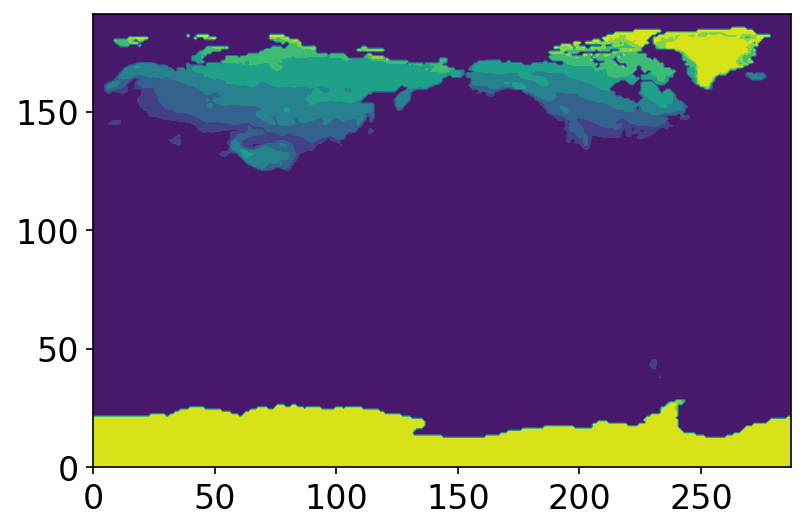

In [5]:
plt.contourf(total_days_below_freezing_file['arise_2060s_total_days_below_freezing_mean'])

In [7]:
arise_2060s_mean_total_below_freezing = total_days_below_freezing_file['arise_2060s_total_days_below_freezing_mean']
arise_2060s_mean_continuous_below_freezing = cont_days_below_freezing_file['arise_2060s_continuous_days_below_freezing_mean']

In [8]:
arise_2060s_mean_total_below_freezing = np.array(arise_2060s_mean_total_below_freezing)
arise_2060s_mean_total_below_freezing[arise_2060s_mean_total_below_freezing==0] = np.nan

arise_2060s_mean_continuous_below_freezing = np.array(arise_2060s_mean_continuous_below_freezing)
arise_2060s_mean_continuous_below_freezing[arise_2060s_mean_continuous_below_freezing==0] = np.nan

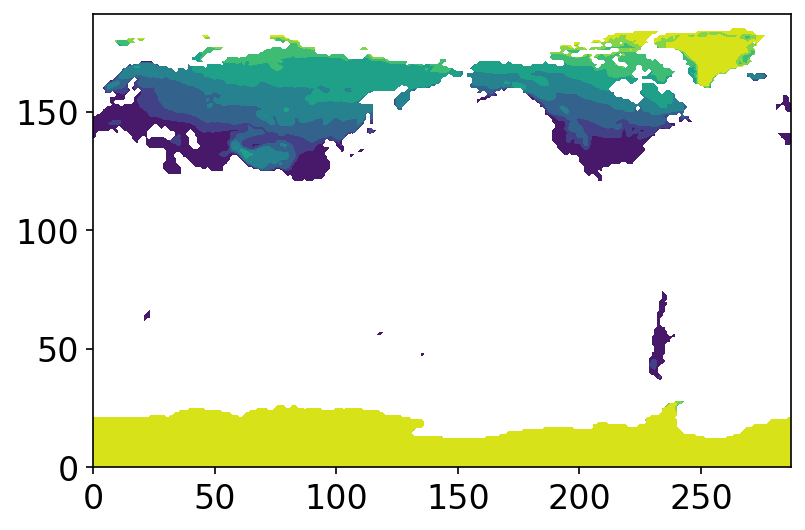

In [9]:
plt.contourf(arise_2060s_mean_total_below_freezing)

In [36]:
np.shape(arise_2060s_mean_total_below_freezing)[1]

91

In [11]:
number_of_days = []
continuous_duration = []
for lat in range(np.shape(arise_2060s_mean_total_below_freezing)[0]):
    for lon in range(np.shape(arise_2060s_mean_total_below_freezing)[1]):
        if arise_2060s_mean_total_below_freezing[lat,lon] !=np.nan:
            number_of_days.append(arise_2060s_mean_total_below_freezing[lat,lon])
        if arise_2060s_mean_continuous_below_freezing[lat,lon] !=np.nan:
            continuous_duration.append(arise_2060s_mean_continuous_below_freezing[lat,lon])

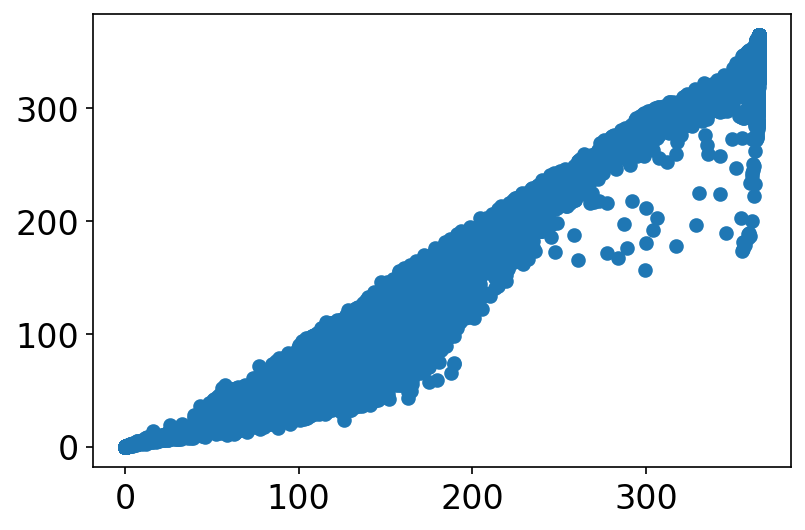

In [12]:
plt.scatter(number_of_days,continuous_duration)

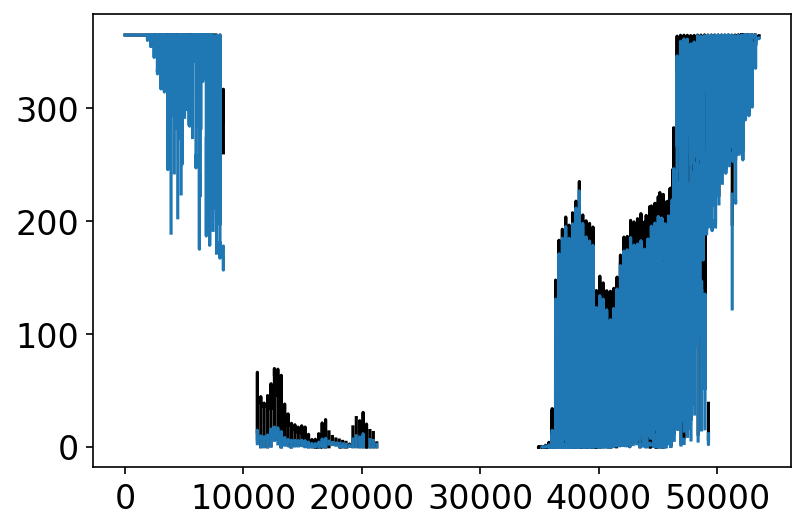

In [13]:
plt.plot(number_of_days,color='k')
plt.plot(continuous_duration)

Text(0.5, 1.05, 'Days Below Freezing Global ARISE 2060s')

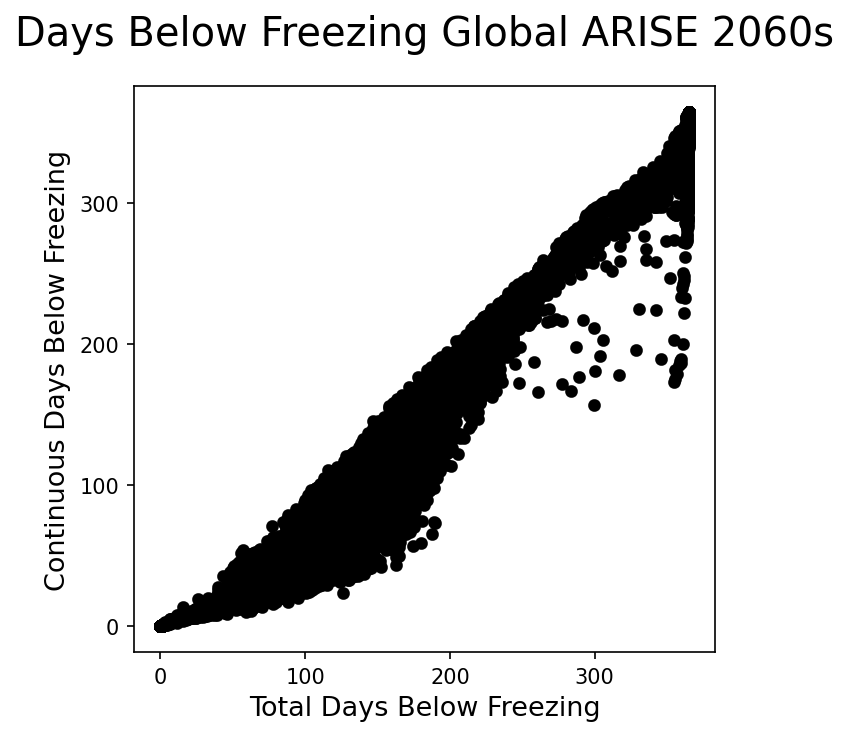

In [14]:
fig,ax= plt.subplots(figsize =(5,5),facecolor='white') 
plt.scatter(number_of_days,continuous_duration,color='k',linewidths=0.1)

plt.xlabel('Total Days Below Freezing',fontsize=13)
plt.ylabel('Continuous Days Below Freezing',fontsize=13)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.title('Days Below Freezing Global ARISE 2060s',y=1.05)

In [15]:
cesm_2060s_mean_total_below_freezing = total_days_below_freezing_file['cesm_2060s_total_days_below_freezing_mean']

cesm_2060s_mean_continuous_below_freezing = cont_days_below_freezing_file['cesm_2060s_continuous_days_below_freezing_mean']

In [16]:
cesm_2060s_mean_total_below_freezing = np.array(cesm_2060s_mean_total_below_freezing)
cesm_2060s_mean_total_below_freezing[cesm_2060s_mean_total_below_freezing==0] = np.nan

cesm_2060s_mean_continuous_below_freezing = np.array(cesm_2060s_mean_continuous_below_freezing)
cesm_2060s_mean_continuous_below_freezing[cesm_2060s_mean_continuous_below_freezing==0] = np.nan

In [17]:
number_of_days = []
continuous_duration = []
for lat in range(np.shape(cesm_2060s_mean_total_below_freezing)[0]):
    for lon in range(np.shape(cesm_2060s_mean_total_below_freezing)[1]):
        if cesm_2060s_mean_total_below_freezing[lat,lon] !=np.nan:
            number_of_days.append(cesm_2060s_mean_total_below_freezing[lat,lon])
        if cesm_2060s_mean_continuous_below_freezing[lat,lon] !=np.nan:
            continuous_duration.append(cesm_2060s_mean_continuous_below_freezing[lat,lon])

Text(0.5, 1.05, 'Days Below Freezing Global CESM 2060s')

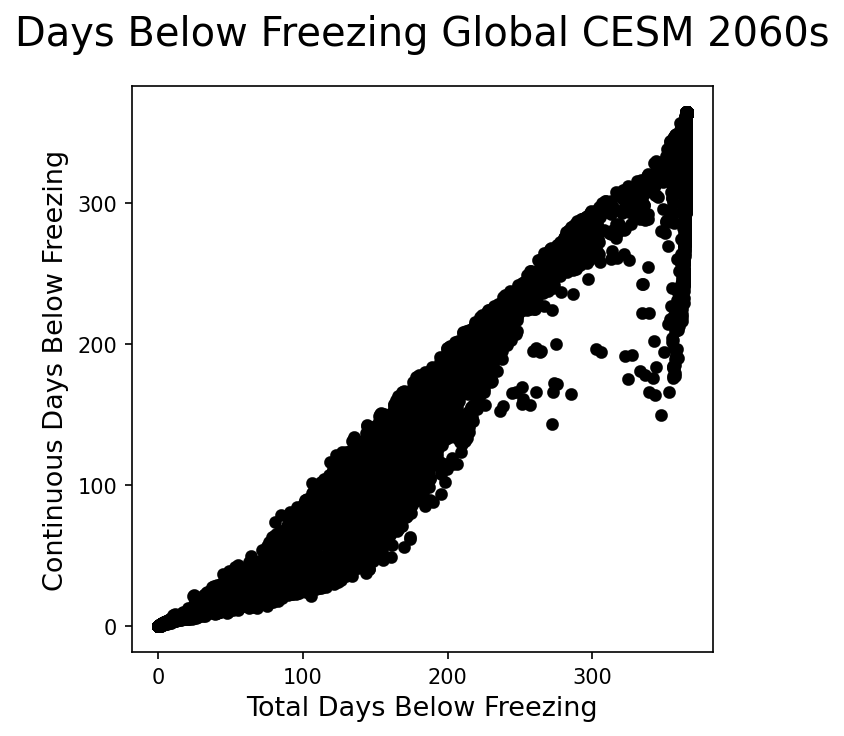

In [18]:
fig,ax= plt.subplots(figsize =(5,5),facecolor='white') 
plt.scatter(number_of_days,continuous_duration,color='k',linewidths=0.1)

plt.xlabel('Total Days Below Freezing',fontsize=13)
plt.ylabel('Continuous Days Below Freezing',fontsize=13)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.title('Days Below Freezing Global CESM 2060s',y=1.05)